In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
train_Y=train_Y.reshape(-1,1)

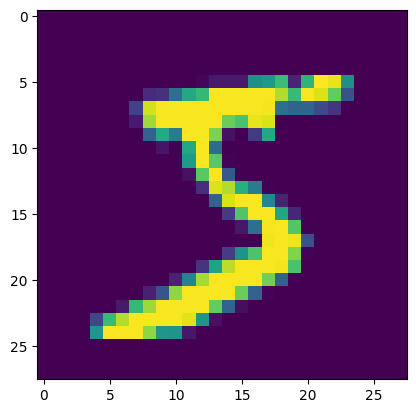

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0])

In [ ]:
train_X=train_X.reshape(-1,28,28,1)

In [ ]:
train_X.shape

(60000, 28, 28, 1)

In [ ]:
train_X=train_X/255
test_X=test_X/25

In [ ]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(train_X,train_Y,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.8978 - loss: 0.3404
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 34ms/step - accuracy: 0.9841 - loss: 0.0519
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9899 - loss: 0.0327
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9926 - loss: 0.0248
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9944 - loss: 0.0174
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - accuracy: 0.9958 - loss: 0.0128
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 25ms/step - accuracy: 0.9970 - loss: 0.0098
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9968 - loss: 0.0090
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9969 - loss: 0.0085
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9983 - loss: 0.0055


In [ ]:
pred1=model1.predict(test_X)
from sklearn.metrics import classification_report

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [ ]:
import numpy as np
print(classification_report(test_Y,np.argmax(pred1,axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.95      1.00      0.97       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(test_Y,np.argmax(pred1,axis=1)))

[[ 977    0    0    1    0    0    0    1    1    0]
 [   0 1116    1    4    0    2    0    0   12    0]
 [   0    0 1018    9    1    0    0    3    1    0]
 [   0    0    2 1001    0    3    0    0    4    0]
 [   0    0    0    0  978    0    1    0    2    1]
 [   2    0    0   11    0  867    1    0   10    1]
 [   4    2    0    0    4    0  936    0   12    0]
 [   0    1    4    2    2    0    0 1016    1    2]
 [   1    0    0    1    0    1    0    1  970    0]
 [   0    0    0    0   12    1    0    2   12  982]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model2 = Sequential()
model2.add(Conv2D(8, (3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(train_X, train_Y, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 32ms/step - accuracy: 0.7398 - loss: 0.7952
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9704 - loss: 0.1210
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9801 - loss: 0.0828
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 36ms/step - accuracy: 0.9833 - loss: 0.0744
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9856 - loss: 0.0571
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9869 - loss: 0.0551
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 38ms/step - accuracy: 0.9890 - loss: 0.0457
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9901 - loss: 0.0392
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9899 - loss: 0.0463
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9918 - loss: 0.0351


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(test_Y,np.argmax(model2.predict(test_X),axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
[[ 970    0    0    0    0    0    6    1    3    0]
 [  10 1029    5    0    6    2   20    1   48   14]
 [   3    0 1018    0    1    0    5    2    3    0]
 [   0    0   19  921    0    9    6    0   48    7]
 [   0    0    0    0  974    0    3    0    3    2]
 [   1    0    1    2    1  792   19    0   69    7]
 [   2    1    0    0    0    1  950    0    4    0]
 [   0    0   22    0    9    0    0  979    9    9]
 [   0    0    2    0    1    0    0    0  971    0]
 [   0    0    0    0   10    0    1    1   30  967]]


In [ ]:
print(classification_report(test_Y,np.argmax(model2.predict(test_X),axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.91      0.95      1135
           2       0.95      0.99      0.97      1032
           3       1.00      0.91      0.95      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.89      0.93       892
           6       0.94      0.99      0.97       958
           7       0.99      0.95      0.97      1028
           8       0.82      1.00      0.90       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

